#### 定義較複雜的montage
- X: image matrix in which each column respersents an image 
- n, m: image size n*m
- h, w: create an montage front size = (w,h)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io 
import os
##---------------------定義montage
def show_montage(X, n, m, h, w):
    fig, axes = plt.subplots(h, w, figsize = (w,h)) 
    if X.shape[1] < w * h: #影像張數不到 w * h 張，用 0 向量補齊 
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
##------------------------讀檔
D = scipy.io.loadmat("allFaces.mat")
X = D['faces'] # 32256*2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
# n_persons = len(y)
n_persons = D['person'].item() # 38
# print(X.keys())
# print(y.sum())


<font color=YELLOW>範例一:展示所有人(38人)的第一張影像圖</font>：


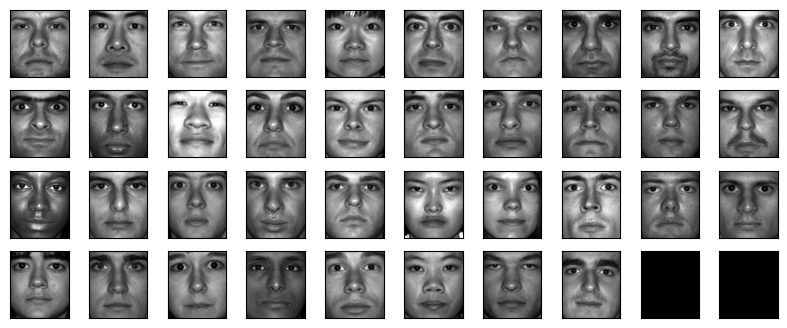

In [7]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
# check all 38 different persons
show_montage(all_diff_persons, n, m, 4,10)

#### <font color=YELLOW>展示某個人的所有樣本影像</font>
- which_person 數值為決定某人的所有影像

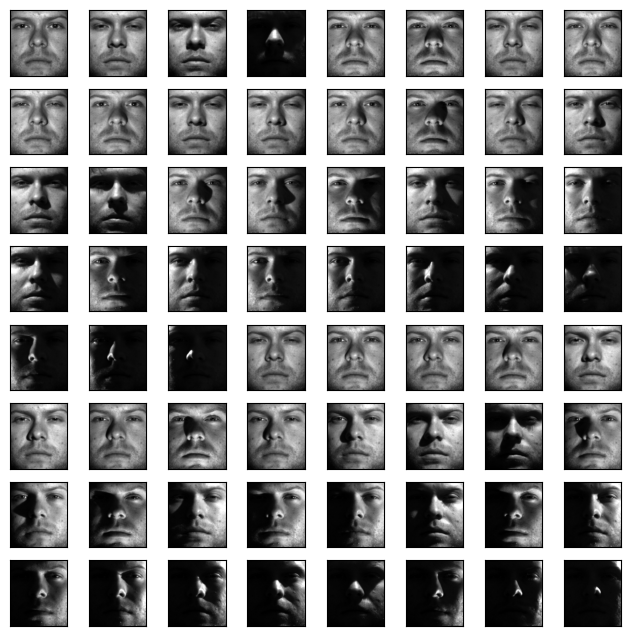

In [11]:
which_person = 0 # 0 ~ 37
start_col = y[0:which_person].sum()
end_col = start_col + y[which_person]
show_montage(X[:, start_col:end_col], n, m, 8, 8)

#### <font color=YELLOW>範例二:SVD分解</font>

In [12]:
from numpy.linalg import svd

# avgFace = X.mean(axis=1).reshape(-1,1)
# X_avg = X - np.tile(avgFace, (1, X.shape[1]))
avgFace = X.mean(axis=1)
X_avg = X - avgFace.reshape(-1,1)
U, E, VT = svd(X_avg, full_matrices = False)


#### <font color=YELLOW>範例二:Display the basis of eigenfaces</font>
- 組成人臉的基底向量
- 每張不同人臉影像的差別在於組成的基底向量係數，即只須為每張影像保存期係數，外加這些基底。

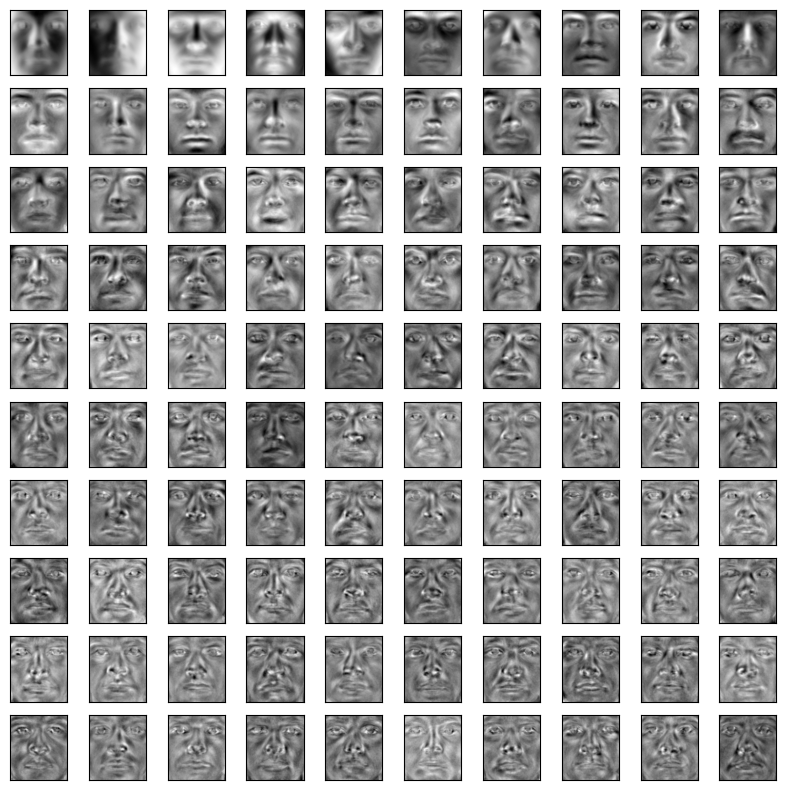

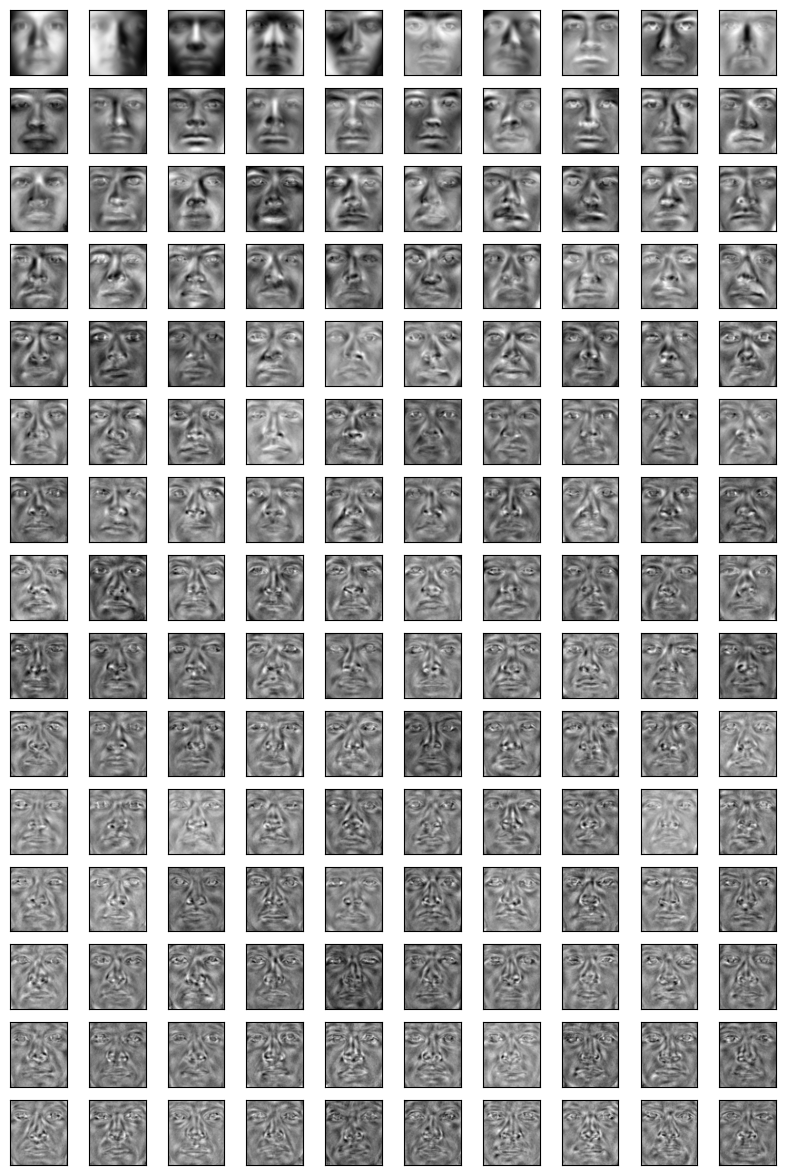

In [14]:
import matplotlib.pylab as plt
#Show the first 36 bases
show_montage(U, n, m, 10, 10)
show_montage(225-U, n, m, 10, 10)

#### <font color=YELLOW>範例3: Display the basis of eigenfaces</font>

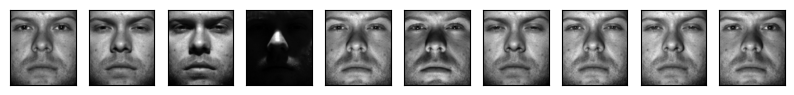

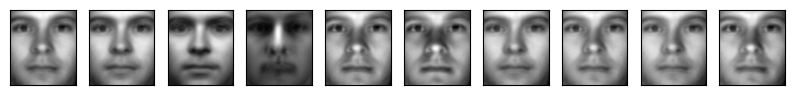

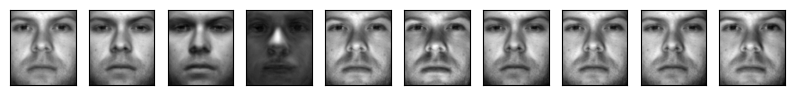

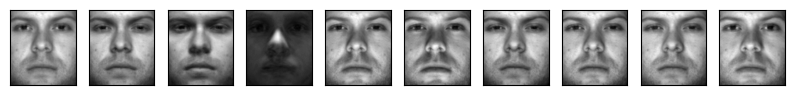

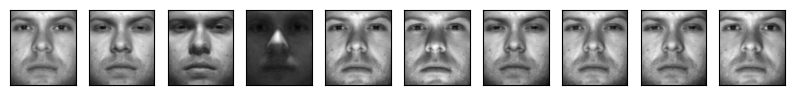

[112.1  22.4  11.2   5.6]


In [16]:
h, w = 1, 10
show_montage(X, n, m, h, w)
q = np.array([20, 100, 200, 400])
for i in q:
    Uq = U[:,:i]
    Xq = Uq @ (Uq.T @ X[:, :h*w])  #  主成分Zq:(Uq.T @ X[:, :h*w]) 
    Xq = Xq + avgFace[:, np.newaxis]
    show_montage(Xq, n, m, h, w)

compress_ratio = (X.shape[0] * X.shape[1])/(X.shape[0] * q + q * X.shape[1])
print(np.round(compress_ratio, 1))

#### <font color=YELLOW>範例4: 未加入主成分分析的新影像壓縮圖/還原與加密/解密</font>

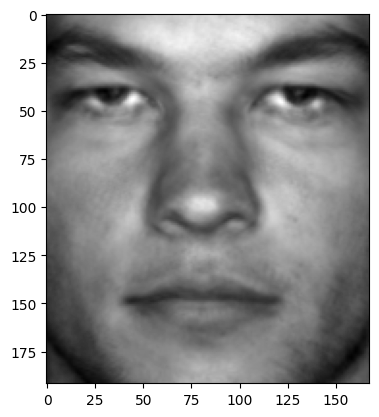

In [19]:
# test 1
q = 200
x_new = X[:, np.sum(y[:36])]
x = U[:,0:q] @ (U[:, 0:q].T @ x_new) # + avg_face.reshape(1,-1)
plt.imshow(x.reshape(m, n).T, cmap='gray')
plt.show()

In [20]:
from numpy.linalg import svd
U_BASE = 30
U, E, VT = svd(X_avg[:, :np.sum(y[:U_BASE])], full_matrices = False)

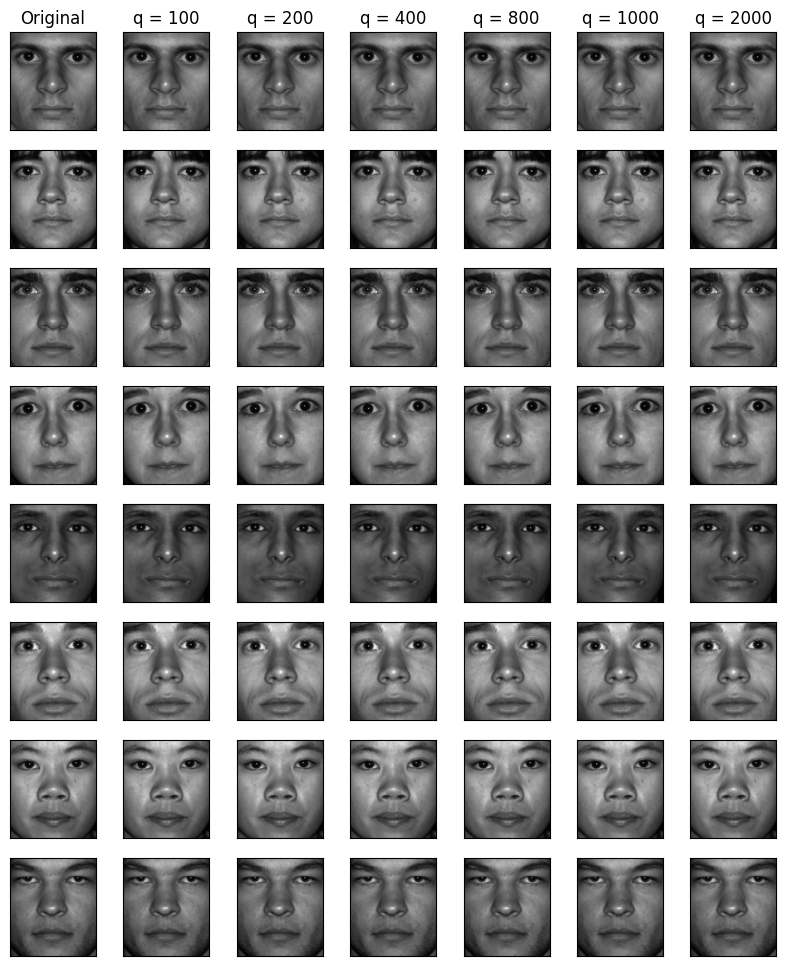

In [23]:
q = np.array([100, 200, 400, 800, 1000, 2000])
new_pic = np.arange(30,38,1) # really new pictures
# new_pic = np.arange(10,18,1) # picture that parictipate in creating U
fig, ax = plt.subplots(len(new_pic), len(q)+1, figsize=(10,12))

for i in range(len(new_pic)):
    x_new = X[:, np.sum(y[:(new_pic[i]-1)])]
    ax[i][0].imshow((x_new).reshape(m, n).T, cmap='gray')
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    ax[0][0].set_title('Original')

    for j, r in enumerate(q):
        x = U[:, 0:q[j]] @ (U[:, 0:q[j]].T @ x_new)
        ax[i][j+1].imshow((x_new).reshape(m, n).T, cmap='gray')
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        if i == 0:
            ax[i][j+1].set_title('q = {}'.format(q[j]))
plt.show()
    